# Binary Classification Prediction for type of Breast Cancer

## Machine Learning Course - NCSR Demokritos 2022-2023

### Author: Alexandros Filios - mtn2219


#### About:
**_Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area._**

## Libraries:

In [51]:
# Data
import numpy as np
import pandas as pd

# ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Plots
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px


## Data Processing

### Dataset Formatting

#### Read the data

In [52]:
df=pd.read_csv("breast-cancer.csv") # Read the .csv file and get the pandas dataset

#### Bring the data in the form of X, y

In [53]:
# Remove the id as it does not actually resemble a feature
df = df.drop("id", axis=1)
# Encode the diagnosis label as follows: 1 for Malignant & 0 Benign
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) 
# Extract the labels for all of our data
y = df["diagnosis"]
# Remove the labels from the data
X = df.drop("diagnosis", axis=1)

In [54]:
df.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [55]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [56]:
# Split the  data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10, stratify=y)

### Feature Selection

There are several reasons to apply feauture selection on our data. From achieving better performance to even avoiding overfitting. Of course some of the classfiers we are going to use are considered to be robust to noisy/non-informative features. Despite that fact in this implementation we will try to achieve simple and faster models and reduce the number of features, by keeping the most meaningful ones, in a way that makes the data more understandable for both the developers and the possible clients(doctors and patients).

#### Histograms

In [57]:
df.columns.shape[0]

31

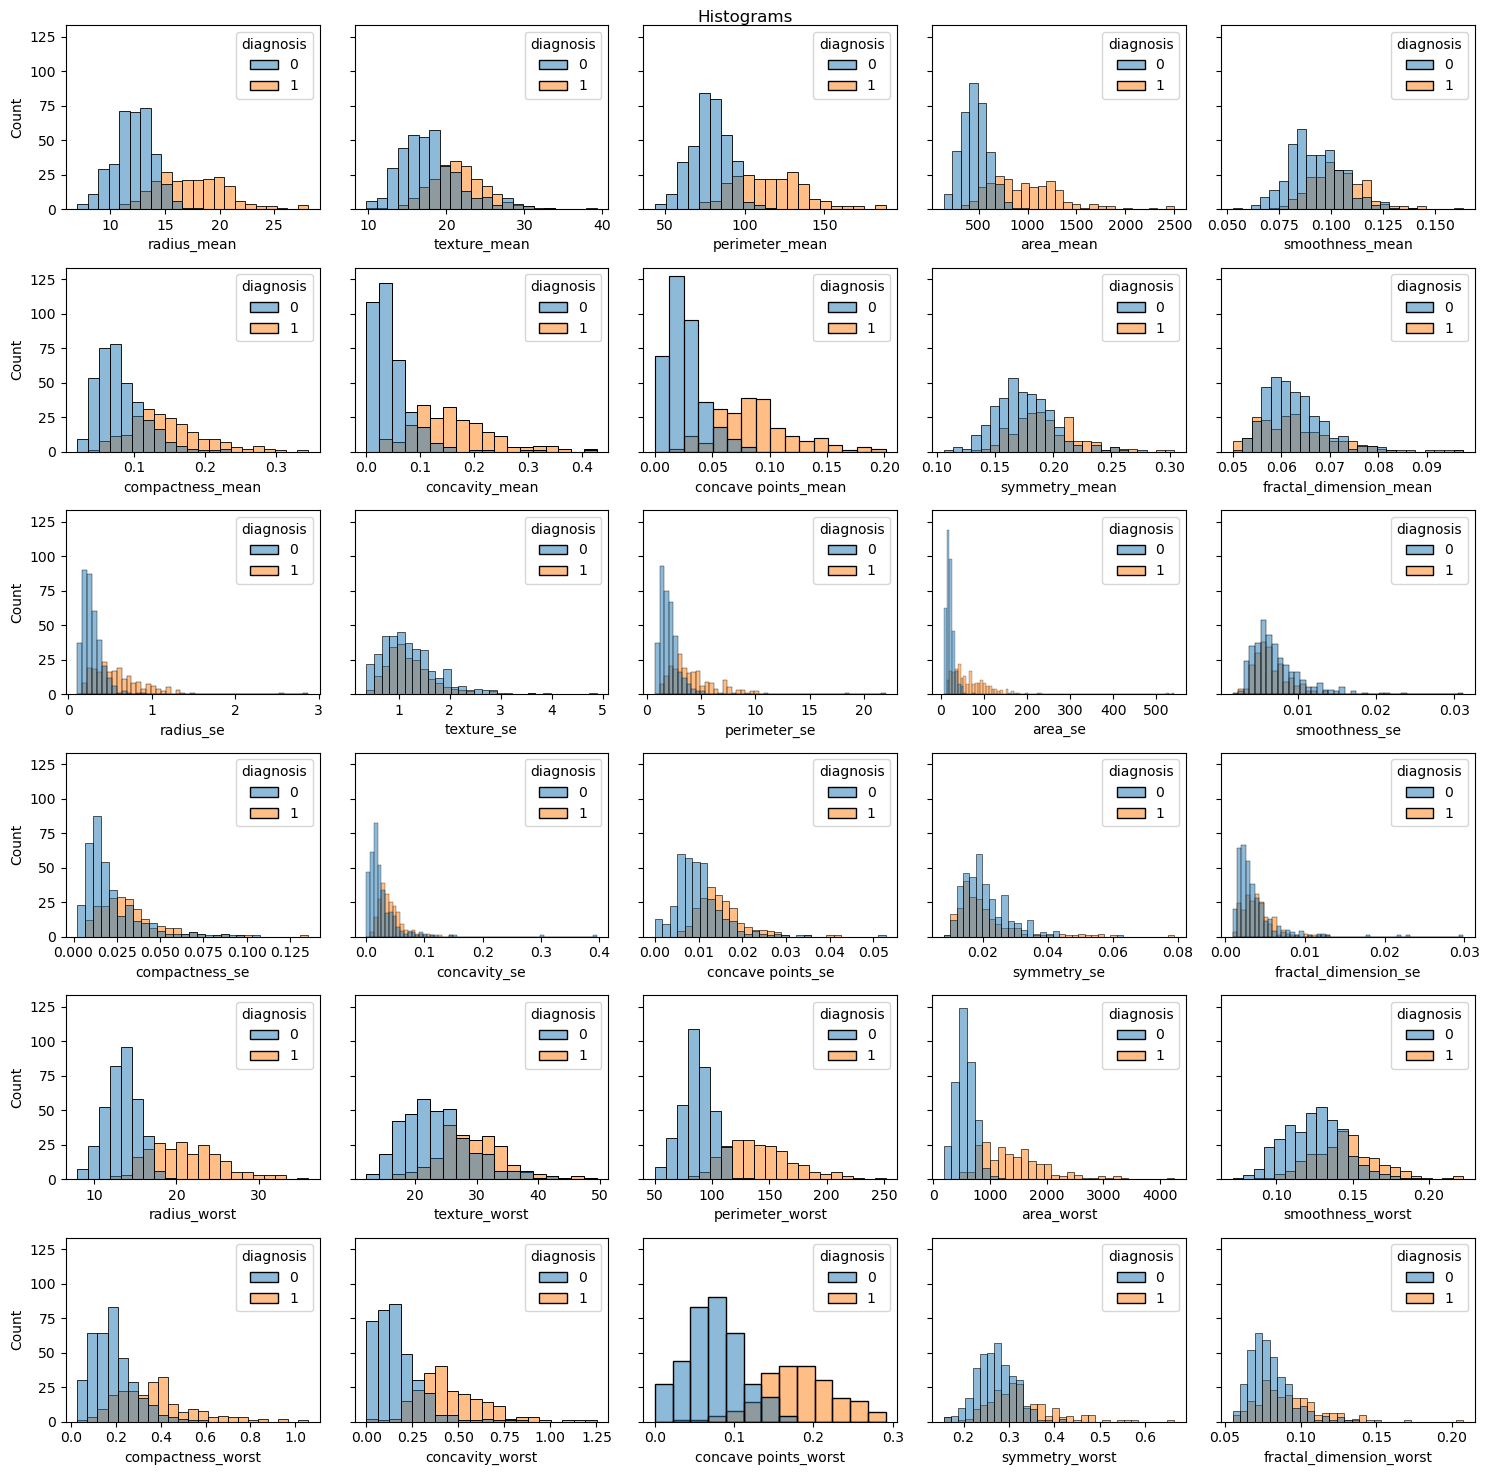

In [67]:
num_of_rows = 6
num_of_cols = 5
fig, axes = plt.subplots(num_of_rows, num_of_cols, figsize=(15, 15),  tight_layout=True, sharey=True)
fig.suptitle('Histograms')
i=0
j=0
for feature in df.columns:
    if(feature == 'diagnosis'):
        continue
    #fig = px.histogram(data_frame=df,x=feature,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
    sb.histplot(ax=axes[i,j], data=df, x=feature, hue="diagnosis")
    #axes[i,j].set_title(feature)
    if(j == num_of_cols-1):
        i+=1
        j=0
    else:
        j+=1

Feature Selection: How
1) Measure (Pearson) correlation
- Between features (we want it to be small!) or
- Between features and target values (we want it to be big!)
2) Using a “Wrapper” method:
- Train and evaluate a model with different features and use its performance to evaluate the features used
- Backward elimination: use all features and remove features
- Recursive elimination: recursively remove features and build a model on the remaining features (uses accuracy)
3) Lasso (also used for regularization)

#### Pearson Correlation

In [60]:
pearsoncorr = X.corr(method='pearson')

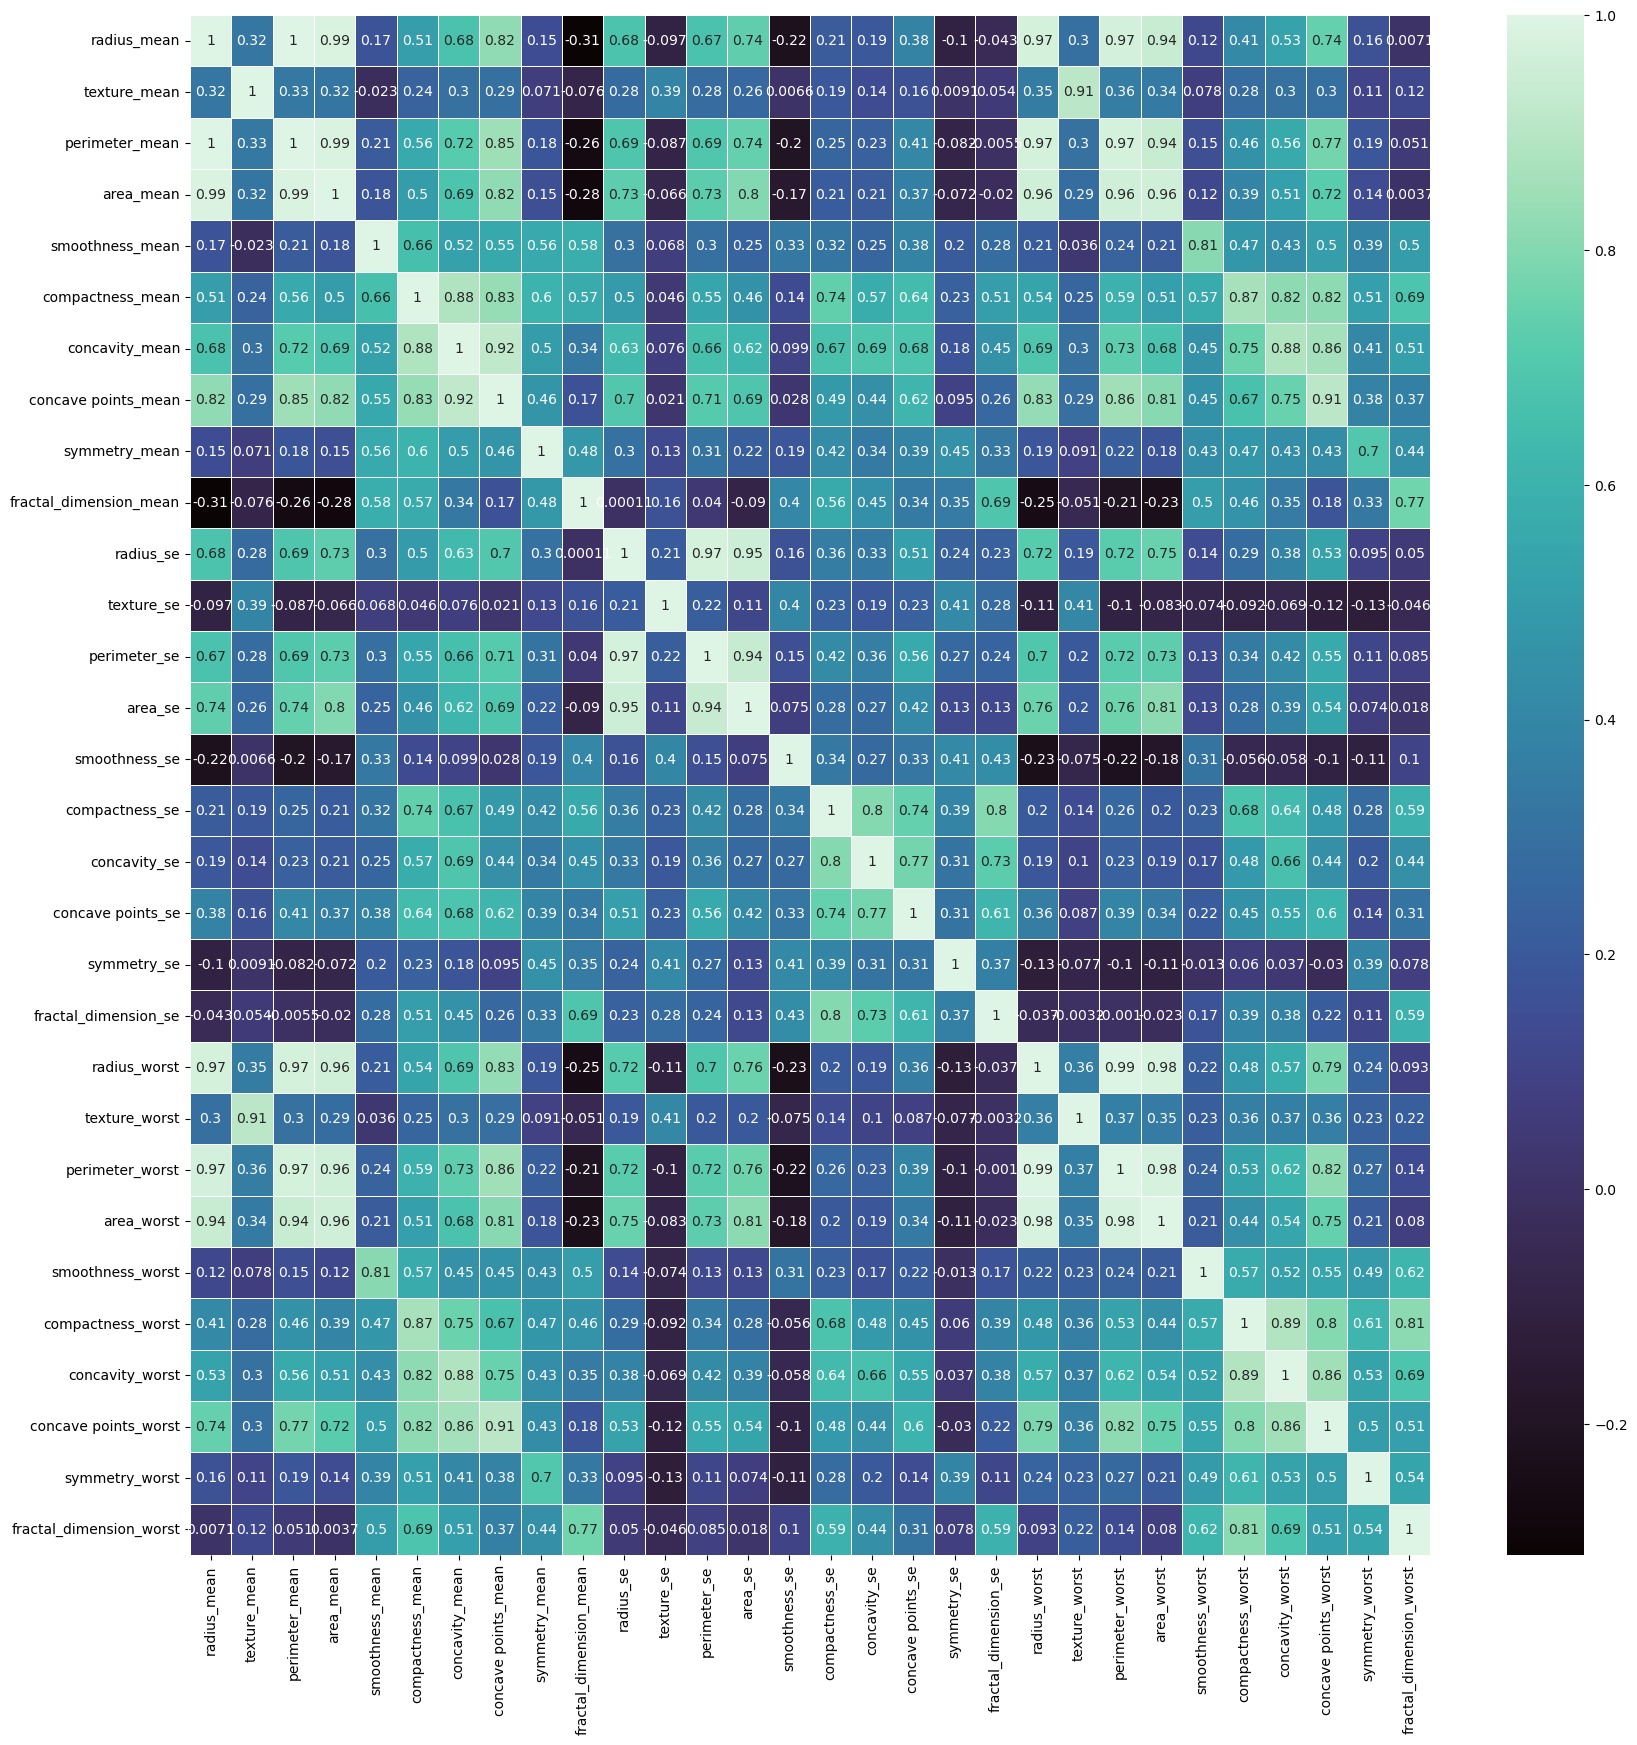

In [61]:
plt.figure(figsize=(20,20))

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='mako',#cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

#### Wrapper

#### Lasso

### Feature Scaling

Why?
- Features in a controlled range so that we avoid problems with numerical overflow
- Increased speed learning (consider gradient descent)
- Distance-based algorithm such as knn, k-means and svm are affected by range of features

In [62]:
# define standard scaler
scaler = StandardScaler()
  
# transform data
X_Scaled = scaler.fit_transform(X) # Returns an array[[]]

### Feature Scaling
- Standardization(z-normalization): Each feature x(i) is normalized as a standard normal distribution with 0, 1 μ and standard deviation σ

Why: 
- Features in a controlled range so that we avoid problems with numerical overflow
- Increased speed learning (consider gradient descent)
- Distance-based algorithm such as knn, k-means and svm are affected by range of features

**Note**: Scaling parameters (either min/max or μ/σ) are computed on the training data and applied on the validation data